## Getting Started

( We assume the spectrochemistry package has been properly installed - if not please go to :ref:`install`)

Before using the package, we need to load the **API ( *Application Programming Interface* )**

In [1]:
from spectrochempy.api import *

## Preferences

Many options of the API can be set up using the preference manager.

To use a graphical interface for the preferences, just type the command : **`view_preferences()`**.

In [2]:
#view_preferences()

This open a window such this one, allowing to set some API preferences:

![ ](../images/prefs.png)


But preferences can also be set up programmatically:

In [3]:
preferences.general.log_level = 'INFO'

In the above cell, we have set the **log** level to display ``info`` messages, such as this one:

In [4]:
log.info('this is an info message!')
log.debug('this is a debug message!')

this is an info message!


Only the info message is displayed, as expected.

If we change it to ``DEBUG``, we should get the two messages

In [5]:
preferences.general.log_level = 'DEBUG'

log.info('this is an info message!')
log.debug('this is a debug message!')

this is an info message!
this is a debug message!


Let's now come back to a standard level of message for the rest of the Tutorial.

In [6]:
preferences.general.log_level = 'WARNING'

log.info('this is an info message!')
log.debug('this is a debug message!')
log.warning('this is a warning message!')

this is a warning message!


## Access to scientific libraries

Several libraries are imported with **SpectroChemPy** (so you don't need to re-import them):

- **np** :  This is actually the **`numpy`** library, to perform numerical calculation on nD arrays.
- **plt** : This is the **`matplotlib`** library, to allow plotting data 

Optionally, **scipy** and **sympy** can be available, if **SpectroChempy** can find these libraries installed on your system.

<IPython.core.display.Javascript object>


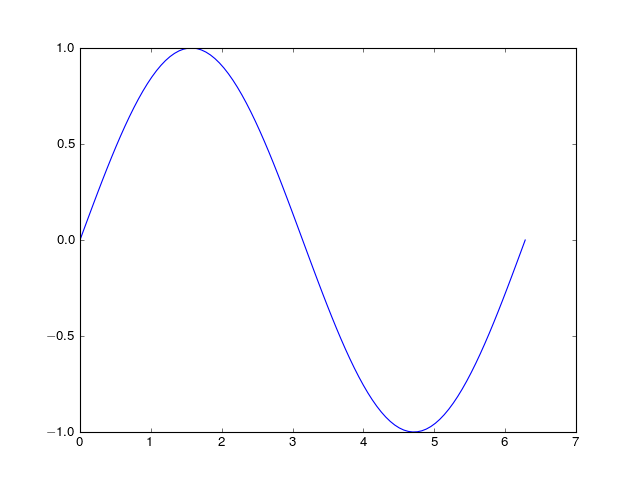

In [7]:
x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.plot(x,y)

## Units, uncertainties and measurements

The objets **ur**, **quantity** and **measurement**, based on the **`pint`** and **`uncertainties`** librairies allows the manipulation of data with units and uncertainties. (see tutorial-1-units-uncertainties)

In [8]:
19.4 * ur.cm / (10 * ur.s)

<Quantity(1.94, 'centimeter / second')>

In [9]:
x= quantity(10., 'km')
x

<Quantity(10.0, 'kilometer')>

In [12]:
y = measurement(10, .01, 'km')
print(y)  #TODO: _repr_html not working

(10.000 +/- 0.010) kilometer


# Using the API: a first example with the Isotope database

If you are interested by **NMR**, it might be useful to have information about NMR isotopes, *e.g.*, to include this in some further calculations.

Let's get information about the $^{27}$Al nucleus. 

We use the **Isotopes** class:

In [13]:
al = Isotopes('27Al')
al

Isotopes < 27Al >

In [14]:
print(al.symbol, al.spin)

Al 5/2


In [15]:
quadrupolar_moment = al.Q.to('m^2') 
quadrupolar_moment

<Quantity(1.466e-29, 'meter ** 2')>

In [16]:
gyromagnetic_ratio = al.gamma
gyromagnetic_ratio

<Quantity(11.103076875144868, 'megahertz / tesla')>

It is then obvious how to get the Larmor frequency of aluminium:

In [30]:
B0 = quantity('9.4 tesla')
print("{freq:~.2f} at {B0:~.2f}".format(freq=al.gamma * B0, B0=B0))

104.37 MHz at 9.40 T
